In [50]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='__removido__', project_access_token='__removido__')
pc = project.project_context

# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [29]:
!pip install scikit-learn --upgrade
# !pip install xgboost --upgrade
# !pip install imblearn --upgrade
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install seaborn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)
Requirement already up-to-date: pandas in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.1.1)
Requirement already up-to-date: matplotlib in /opt/conda/envs/Python36/lib/python3.6/site-packages (3.3.1)
Requirement already up-to-date: numpy in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.19.1)
Requirement already up-to-date: seaborn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.10.1)


<hr>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
# from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
# from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

## Download dos conjuntos de dados em formato .csv

In [31]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv -O training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-06 14:40:37--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv’

100%[======================================>] 1,736,600   --.-K/s   in 0.04s   

2020-09-06 14:40:37 (39.5 MB/s) - ‘training_dataset.csv’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [32]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

In [33]:
target = 'categoria'
bool_features = ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
             'importante_ter_certificado']
cat_features = ['graduacao', 'universidade', 'profissao', 'organizacao',
            'como_conheceu_lit']
num_features = ['id', 'horas_semanais_estudo', 'total_modulos',
            'modulos_iniciados', 'modulos_finalizados', 'certificados']
# for col in bool_features:
#   df_training_dataset[col] = df_training_dataset[col].astype('boolean')
# for col in bool_features + cat_features + [target]:
#   df_training_dataset[col] = df_training_dataset[col].astype('category')

# Ensure all numeric columns contain only integers (and NaNs)
assert all([all(x.is_integer() for x in df_training_dataset[col].fillna(-9999)) for col in num_features])

df_training_dataset.info()
print('\n{} numerical features:\n\t{}'.format(len(num_features), num_features))
print('{} boolean features:\n\t{}'.format(len(bool_features), bool_features))
print('{} categorical features:\n\t{}'.format(len(cat_features), cat_features))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [34]:
X = df_training_dataset.drop(target, axis=1)
y = df_training_dataset[target]

seed=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=seed)

In [35]:
# Proportion of NaNs in each column
display((X_train.isnull().sum() / len(X_train)).round(2))

id                            0.12
graduacao                     0.12
universidade                  0.12
profissao                     0.12
organizacao                   0.12
pretende_fazer_cursos_lit     0.12
interesse_mba_lit             0.12
importante_ter_certificado    0.12
horas_semanais_estudo         0.12
como_conheceu_lit             0.12
total_modulos                 0.12
modulos_iniciados             0.11
modulos_finalizados           0.12
certificados                  0.12
dtype: float64

In [36]:
X_train.describe(include=np.number).round(1)

,id,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
count,9754.0,9783.0,9794.0,9741.0,9746.0,9808.0,9832.0,9750.0,9754.0
mean,556321748.0,0.5,0.5,1.0,6.0,79.4,37.5,31.0,0.4
std,260267004.6,0.5,0.5,0.0,2.6,109.5,61.3,54.2,1.3
min,100033956.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0
25%,331693497.2,0.0,0.0,1.0,4.0,27.0,6.0,3.0,0.0
50%,561355802.0,0.0,0.0,1.0,6.0,40.0,18.0,13.0,0.0
75%,781324777.5,1.0,1.0,1.0,8.0,97.0,43.0,35.0,0.0
max,999989437.0,1.0,1.0,1.0,10.0,2073.0,1370.0,1359.0,32.0


In [37]:
X_train.describe(exclude=np.number)

,graduacao,universidade,profissao,organizacao,como_conheceu_lit
count,9762,9771,9795,9739,9727
unique,6,21,12,11,9
top,Licenciatura,UEPB,Diretor,Eletroeletronicos,Outros
freq,1673,503,878,924,1951


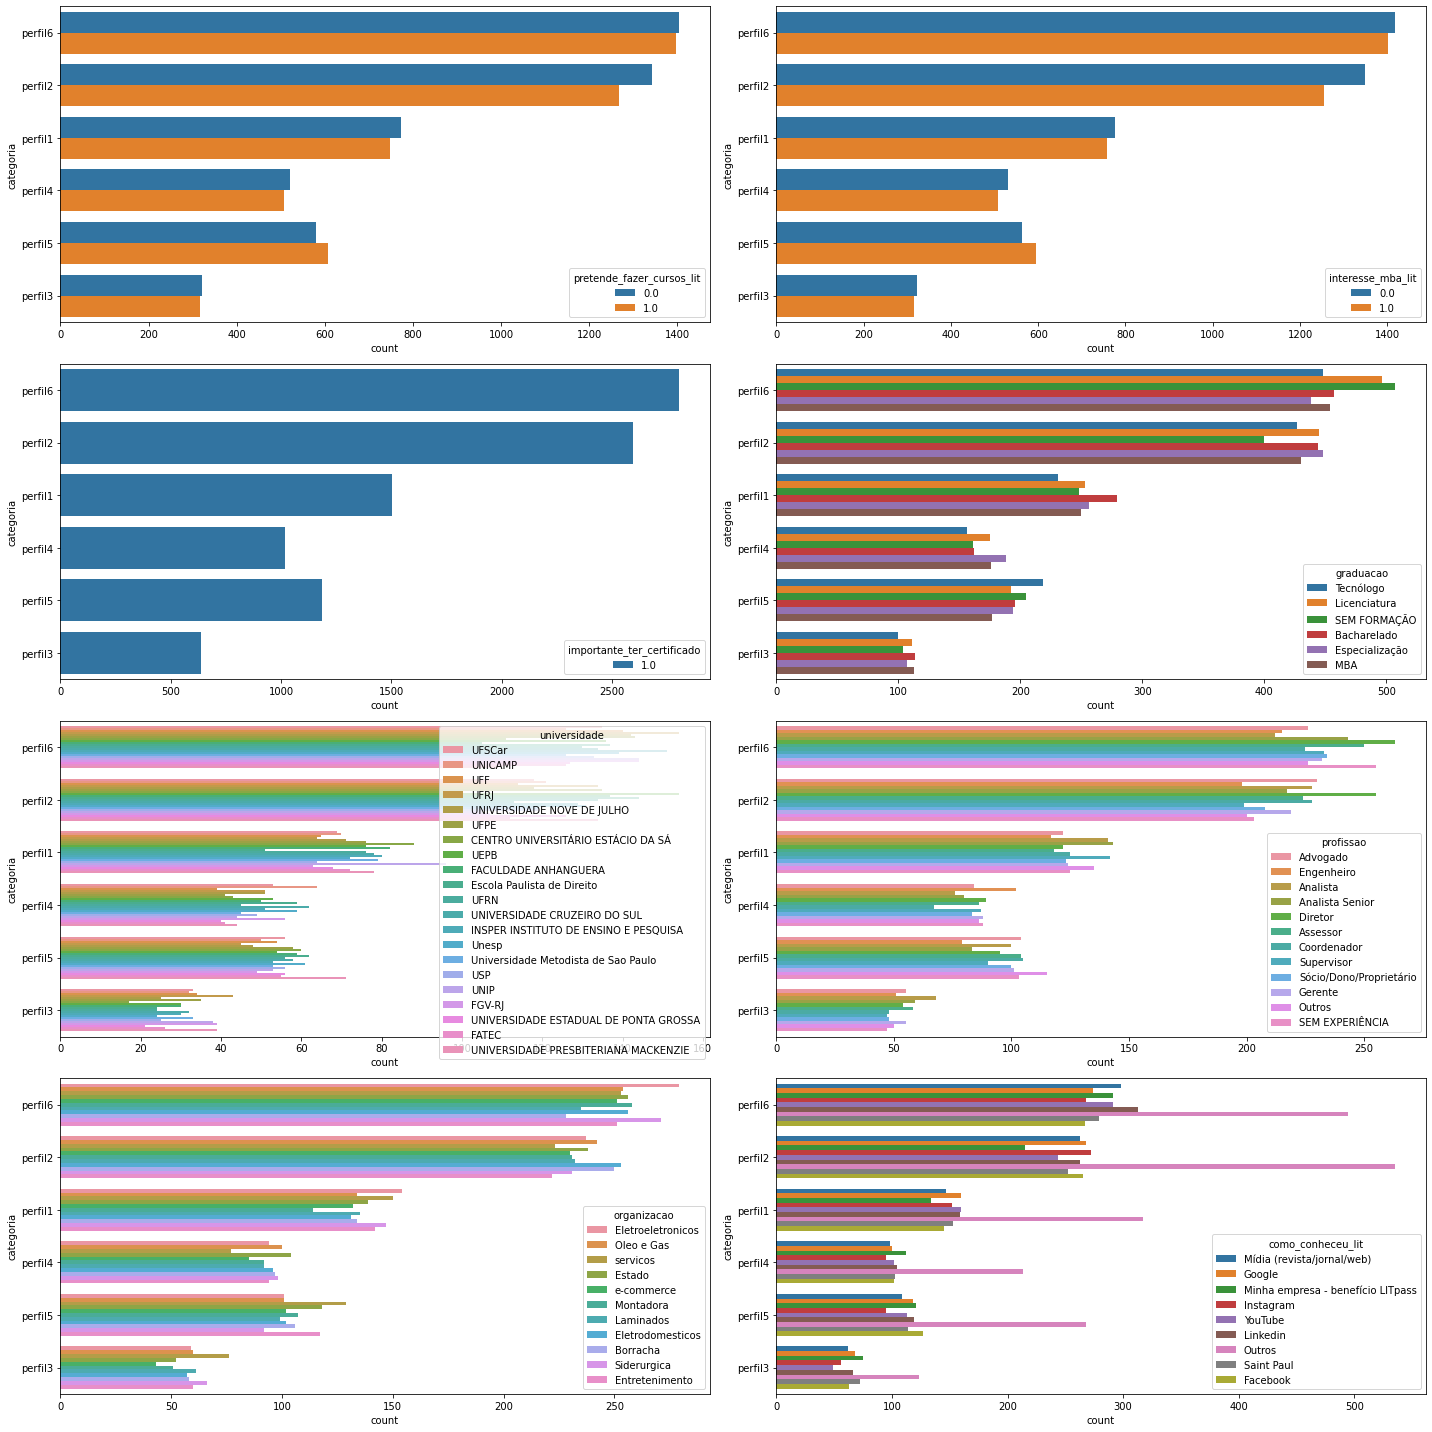

In [38]:
cat_bool_features = bool_features + cat_features
ncols=2
nrows = 1 + ((len(cat_bool_features) - 1) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
  if i < len(cat_bool_features):
    sns.countplot(y=y_train, hue=cat_bool_features[i], data=X_train, ax=ax)
    plt.tight_layout()
plt.show()

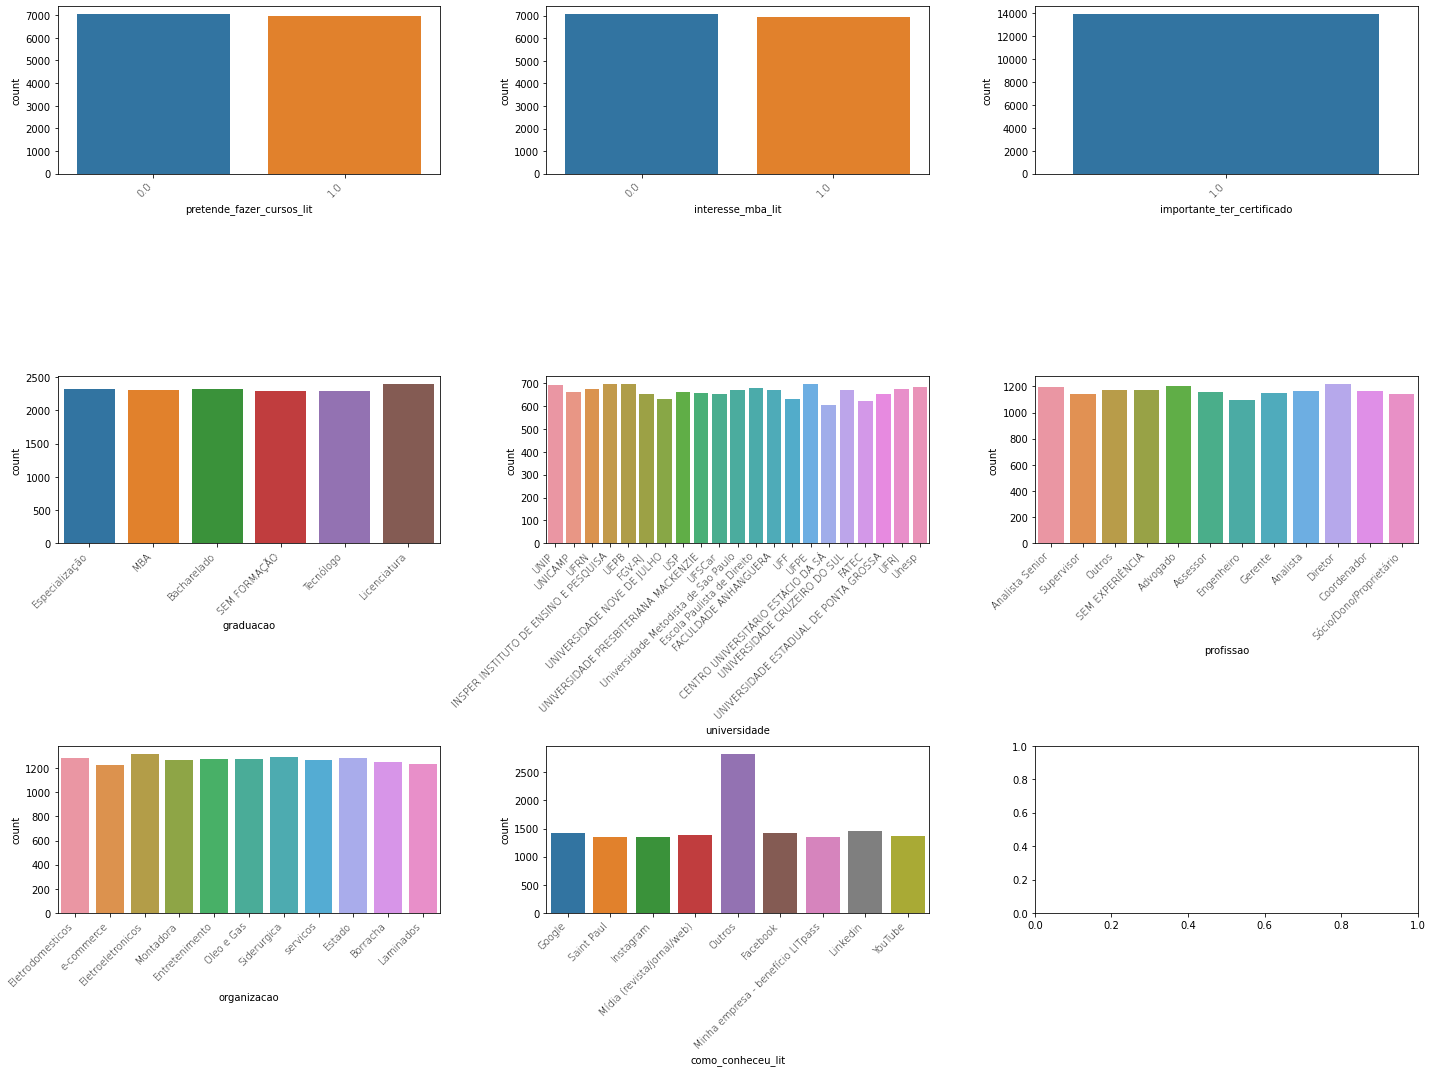

In [39]:
ncols=3
nrows = 1 + ((len(cat_bool_features) - 1) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
  if i < len(cat_bool_features):
    chart = sns.countplot(ax=ax, x=cat_bool_features[i], data=df_training_dataset)
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
    )
    plt.tight_layout()

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

In [40]:
scoring_metric='f1_macro'

log_features = ['total_modulos', 'modulos_iniciados', 'modulos_finalizados', 'certificados']

# 6 numerical features:
# 	['id', 'horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
#    'modulos_finalizados', 'certificados']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

log_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())])

# 3 boolean features:
# 	['pretende_fazer_cursos_lit', 'interesse_mba_lit', 'importante_ter_certificado']
bool_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=100)),
    ('scaler', StandardScaler())])

# 5 categorical features:
# 	['graduacao', 'universidade', 'profissao', 'organizacao', 'como_conheceu_lit']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, list(set(num_features)-set(log_features))),
        ('log', log_transformer, log_features),
        ('bool', bool_transformer, bool_features),
        ('cat', cat_transformer, cat_features)
        ])

pipe = Pipeline([
    ('prep', preprocessor),
    # ('poly', PolynomialFeatures()),
    # ('rfecv', RFECV(estimator=DecisionTreeClassifier(),
    #                 step=1, scoring=scoring_metric, n_jobs=-1, verbose=1)),
    ('pca', PCA()),
    ('clf', DecisionTreeClassifier(random_state=seed))
])

In [41]:
params = [
    {
    'prep__num__imputer__strategy': ['constant'],
    'prep__num__imputer__fill_value': [0],
    'prep__log__imputer__strategy': ['constant'],
    'prep__log__imputer__fill_value': [0],
    'prep__bool__imputer__strategy': ['most_frequent'],
    'prep__cat__imputer__strategy': ['most_frequent'],
    'pca__n_components': [0.75],
    'clf': [RandomForestClassifier(random_state=seed)],
    'clf__max_depth': [11],
    'clf__n_estimators': [68, 69],
    'clf__max_features': [8],
    'clf__min_samples_split': [10],
    'clf__min_samples_leaf': [4, 5],
    'clf__criterion': ['entropy']
    }
]

In [42]:
cv_num = 10
# cv = RandomizedSearchCV(pipe, param_distributions=params, n_jobs=-1, verbose=1, random_state=seed,
#                           cv=cv_num, n_iter=100, scoring=scoring_metric)
cv = GridSearchCV(pipe, params, cv=cv_num, n_jobs=-1, verbose=1, scoring=scoring_metric)
cv.fit(X_train, y_train)
model = cv.best_estimator_

print('Best train score: ', cv.best_score_)
print('Test score: ', cv.score(X_test, y_test))
print('Best estimator: ', cv.best_estimator_)
print('Best parameters: ', cv.best_params_)
display(pd.DataFrame(cv.cv_results_).sort_values('rank_test_score').head())

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.9min finished


Best train score:  0.7399808895865885
Test score:  0.7399319455697125
Best estimator:  Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['horas_semanais_estudo',
                                                   'id']),
                                                 ('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                        

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__criterion,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_leaf,param_clf__min_samples_split,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,17.761636,0.049594,0.040505,0.008076,"RandomForestClassifier(criterion='entropy', ma...",entropy,11,8,4,10,...,0.716258,0.739831,0.751183,0.716107,0.713841,0.772668,0.754944,0.739981,0.019148,1
0,17.559232,0.065774,0.043835,0.010896,"RandomForestClassifier(criterion='entropy', ma...",entropy,11,8,4,10,...,0.713450,0.741133,0.751459,0.715045,0.712270,0.772132,0.750533,0.738935,0.019503,2
3,17.614221,0.108255,0.035490,0.000899,"RandomForestClassifier(criterion='entropy', ma...",entropy,11,8,5,10,...,0.717951,0.738836,0.746113,0.712056,0.718845,0.757555,0.748597,0.736297,0.015565,3
2,17.362299,0.178125,0.035693,0.001499,"RandomForestClassifier(criterion='entropy', ma...",entropy,11,8,5,10,...,0.717951,0.739126,0.743180,0.710174,0.720894,0.758290,0.749895,0.736157,0.015938,4


### Fazendo previsões na amostra de teste

In [43]:
y_pred = model.predict(X_test)
print(y_pred)

['perfil6' 'perfil4' 'perfil6' ... 'perfil6' 'perfil3' 'perfil4']


### Analisando a qualidade do modelo através da matriz de confusão

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

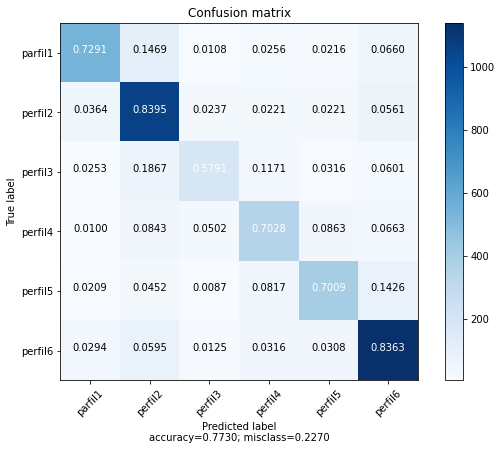

In [45]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [46]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv -O to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
display(df_to_be_scored.tail())
display(df_to_be_scored.nunique())

--2020-09-06 14:47:00--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv’

100%[======================================>] 96,291      --.-K/s   in 0.004s  

2020-09-06 14:47:01 (24.3 MB/s) - ‘to_be_scored.csv’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


id                            1000
graduacao                        6
universidade                    21
profissao                       12
organizacao                     11
pretende_fazer_cursos_lit        2
interesse_mba_lit                2
importante_ter_certificado       1
horas_semanais_estudo            9
como_conheceu_lit                9
total_modulos                  225
modulos_iniciados              155
modulos_finalizados            145
certificados                    13
dtype: int64

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [47]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

In [48]:
y_pred = model.predict(df_to_be_scored)
df_to_be_scored['target'] = y_pred
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1,perfil1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0,perfil2
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0,perfil6
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0,perfil2
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [52]:
project.save_data(file_name="results-v2.csv", data=df_to_be_scored.to_csv(index=False))

{'file_name': 'results-v2.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio6lit-__removido__',
 'asset_id': '__removido__'}

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
